In [15]:
import gensim

C:\Users\Slav\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [16]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
import string
import re

text = ""
with open(r'C:\Users\Slav\Downloads\dump\all.txt') as f:
    text = f.read()
text = re.sub(r"[^A-Za-z ]+", '', text)
stops = set(stopwords.words('english'))
text = text.replace('\n', ' ')
sentences = sent_tokenize(text)
sent = []
for s in sentences:
    ss = s.lower()
    words = word_tokenize(ss)
    words = [k for k in words if len(k) > 3 and k not in stops]
    sent.append(words)
print(sent)

[['open', 'accessprotocolmulticentre', 'randomised', 'placebocontrolled', 'trial', 'extract', 'japaneseherbal', 'medicine', 'daikenchuto', 'preventbowel', 'dysfunction', 'adult', 'livertransplantation', 'studytoshimi', 'kaido', 'tsuyoshi', 'shimamura', 'yasuhiko', 'sugawara', 'hiroshi', 'sadamoriken', 'shirabe', 'michio', 'yamamoto', 'shinji', 'uemototo', 'cite', 'kaido', 'tshimamura', 'sugawara', 'multicentrerandomised', 'placebocontrolled', 'trial', 'extract', 'ofjapanese', 'herbal', 'medicinedaikenchuto', 'prevent', 'boweldysfunction', 'adult', 'livertransplantation', 'study', 'open', 'doibmjopen', 'prepublication', 'history', 'forthis', 'paper', 'available', 'onlineto', 'view', 'files', 'pleasevisit', 'journal', 'onlinehttpdxdoiorgbmjopenreceived', 'march', 'revised', 'june', 'accepted', 'august', 'abstractintroduction', 'multicentre', 'randomised', 'controlledclinical', 'trial', 'determine', 'ability', 'anextract', 'daikenchuto', 'traditional', 'japaneseherbal', 'medicine', 'kampo

In [20]:
# train word2vec on the two sentences
import gensim
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
import string
import re

text = ""
with open(r'C:\Users\Slav\Downloads\dump\all.txt') as f:
    text = f.read()
text = re.sub(r"[^A-Za-z ]+", '', text)
stops = set(stopwords.words('english'))
text = text.replace('\n', ' ')
sentences = sent_tokenize(text)
sent = []
for s in sentences:
    ss = s.lower()
    words = word_tokenize(ss)
    words = [k for k in words if len(k) > 3 and k not in stops]
    sent.append(words)

model = gensim.models.Word2Vec(sent, min_count=3)
model.save('mymodel')
print(model.similarity('paper', 'nutrition'))

[['open', 'accessprotocolmulticentre', 'randomised', 'placebocontrolled', 'trial', 'extract', 'japaneseherbal', 'medicine', 'daikenchuto', 'preventbowel', 'dysfunction', 'adult', 'livertransplantation', 'studytoshimi', 'kaido', 'tsuyoshi', 'shimamura', 'yasuhiko', 'sugawara', 'hiroshi', 'sadamoriken', 'shirabe', 'michio', 'yamamoto', 'shinji', 'uemototo', 'cite', 'kaido', 'tshimamura', 'sugawara', 'multicentrerandomised', 'placebocontrolled', 'trial', 'extract', 'ofjapanese', 'herbal', 'medicinedaikenchuto', 'prevent', 'boweldysfunction', 'adult', 'livertransplantation', 'study', 'open', 'doibmjopen', 'prepublication', 'history', 'forthis', 'paper', 'available', 'onlineto', 'view', 'files', 'pleasevisit', 'journal', 'onlinehttpdxdoiorgbmjopenreceived', 'march', 'revised', 'june', 'accepted', 'august', 'abstractintroduction', 'multicentre', 'randomised', 'controlledclinical', 'trial', 'determine', 'ability', 'anextract', 'daikenchuto', 'traditional', 'japaneseherbal', 'medicine', 'kampo

C:\Users\Slav\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).


In [1]:
import gensim
model = gensim.models.Word2Vec.load(r'C:\Users\Slav\Downloads\dump\mymodel')
print(model.similarity('cerebrum', 'nutrition'))
print(model.similarity('cerebrum', 'cerebellum'))
print(model.similarity('human', 'brain'))

C:\Users\Slav\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")
C:\Users\Slav\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


-0.0546203341118
-0.0213003990208
0.0768168767915


C:\Users\Slav\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  after removing the cwd from sys.path.
C:\Users\Slav\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """


In [3]:
import pandas as pd

data = pd.read_csv(r'C:\Users\Slav\Downloads\dump\structure.csv')
data.head()

,Authoritative Name,Synonym,Category
0,abducens nucleus,abducens nerve nucleus,structure
1,abducens nucleus,abducens nuclei,structure
2,abducens nucleus,Nucleus abducens,structure
3,abducens nucleus,Nucleus nervi abducentis,structure
4,abducens nucleus,Nucleus nervi abducentis,structure


In [13]:
words = []
for i in range(len(data.index)):
    temp = data.loc[i, 'Authoritative Name']
    temp1 = data.loc[i, 'Synonym'].split(' ')
    temp = temp.split(' ')
    temp = [k.lower() for k in temp]
    temp1 = [k.lower() for k in temp1]
    words += temp + temp1
words = list(set(words))
words = [k for k in words if len(k) > 2]
words

['thalamic',
 'fastigii',
 'fusiformis',
 'thalamicus',
 'cingularis',
 'oculomotor',
 'lateropolaris',
 'geniculatum',
 'oculomotorii',
 'fasciculus',
 'prefrontal',
 'group',
 'median',
 'thalamencephalon',
 'posterioris',
 'putamen',
 'eminence',
 'subthalamicum',
 'nonspecific',
 'lingual',
 'diagonalis',
 'fibrae',
 'abducens',
 'restiformis',
 'corporis',
 'efferent',
 'lobe',
 'portion',
 'olfactory',
 'orbitalis',
 'globose',
 'straight',
 'bands',
 'lingualis',
 'cuneatus',
 'part',
 'mediani',
 'rectal',
 'thalamuses',
 'cingulatus',
 'orbitales',
 'dorsal',
 'basal',
 'temporal',
 'cochlear',
 'septo-amygdalicus',
 'cerebelli',
 'centromedian',
 'temporoparietal',
 'superior',
 'temporalis',
 'fusiform',
 'oculomotorius',
 'gyrus',
 'fascia',
 'tactile',
 'callosomarginal',
 'bodies',
 'striae',
 'entorhinalis',
 'radiations',
 'telencephalic',
 'occipito-temporal',
 'hippocampuses',
 'parietalis',
 'occipitotemporalis',
 'lingula',
 'pulvinaris',
 'lateralis',
 'olives',
 '

In [145]:
import numpy as np

counter = 0
similarity = 0
sim1 = []
for i in range(len(words)):
    for j in range(i):
        if i != j:
            try:
                temp = model.wv.similarity(words[i], words[j])
                similarity += np.fabs(temp)
                sim1.append(temp)
                counter += 1
            except:
                pass
            
print("Total pairs number: ", len(words) * (len(words) - 1) // 2)
print("Valid pairs number: ", counter)
print("Average module of similarity: ", similarity / counter)    

Total pairs number:  110685
Valid pairs number:  37401
Average module of similarity:  0.0797135893553


In [86]:
counter = 0
similarity = 0
sim2 = []
for i in range(len(words)):
    for j in range(len(random_words)):
        if i != j:
            try:
                temp = model.wv.similarity(words[i], random_words[j])
                similarity += np.fabs(temp)
                sim2.append(temp)
                counter += 1
            except:
                pass
            
print("Total pairs number: ", len(words) * (len(random_words)))
print("Valid pairs number: ", counter)
print("Average module of similarity: ", similarity / counter) 

Total pairs number:  70179
Valid pairs number:  37729
Average module of similarity:  0.0799554254556


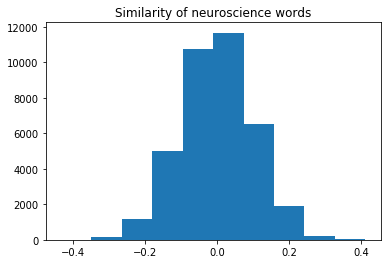

In [87]:
import matplotlib.pyplot as plt

plt.hist(np.array(sim1))
plt.title('Similarity of neuroscience words')
plt.show()

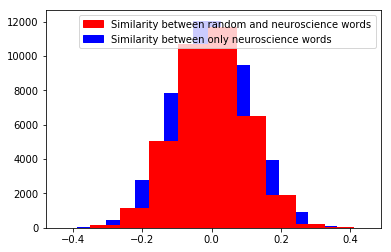

In [97]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

plt.hist(np.array(sim2), color='blue')
plt.hist(np.array(sim1), color='red')
#plt.title('Similarity of neuroscience and random words')
red_patch = mpatches.Patch(color='red', label='Similarity between random and neuroscience words')
blue_patch = mpatches.Patch(color='blue', label='Similarity between only neuroscience words')
plt.legend(handles=[red_patch, blue_patch])
plt.show()

In [89]:
from scipy.stats import ttest_ind

print(ttest_ind(sim1, sim2))
print(np.array(sim1).mean(), np.array(sim2).mean())

Ttest_indResult(statistic=1.3605109464035818, pvalue=0.17367237295376101)
-0.000356599907322 -0.00134860089793


In [90]:
print(ttest_ind(np.fabs(sim1), np.fabs(sim2)))
print(np.array(np.fabs(sim1)).mean(), np.array(np.fabs(sim2)).mean())

Ttest_indResult(statistic=-0.5514250417938229, pvalue=0.58134397816469408)
0.0797135893553 0.0799554254556


In [68]:
import numpy as np

counter = 0
similarity = 0
sim3 = []
for i in range(len(random_words)):
    for j in range(i):
        if i != j:
            try:
                temp = model.wv.similarity(random_words[i], random_words[j])
                similarity += np.fabs(temp)
                sim3.append(temp)
                counter += 1
            except:
                pass
            
print("Total pairs number: ", len(random_words) * (len(random_words) - 1) // 2)
print("Valid pairs number: ", counter)
print("Average module of similarity: ", similarity / counter)    

Total pairs number:  51681
Valid pairs number:  37675
Average module of similarity:  0.0802316094197


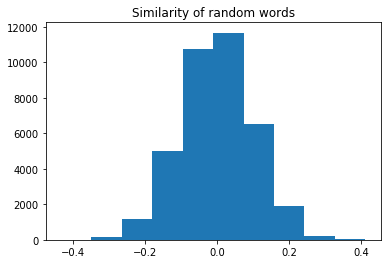

In [69]:
import matplotlib.pyplot as plt

plt.hist(np.array(sim1))
plt.title('Similarity of random words')
plt.show()

In [85]:
random_words = ['cheap', 'unit', 'basic', 'fill', 'chicken', 'distinct', 'displace',
       'theme', 'participate', 'temptation', 'freight', 'offspring',
       'shallow', 'apparatus', 'grow', 'freighter', 'fall', 'heat', 'lid',
       'transparent', 'pressure', 'red', 'twin', 'exaggerate', 'predator',
       'photocopy', 'shame', 'import', 'likely', 'torture', 'float',
       'pay', 'handy', 'victory', 'shiver', 'discreet', 'waterfall',
       'damage', 'meat', 'comedy', 'mention', 'infinite', 'heart', 'gold',
       'deadly', 'fine', 'cabinet', 'pull', 'tender', 'echo', 'virtue',
       'resignation', 'poem', 'lecture', 'stock', 'double', 'elite',
       'dance', 'referral', 'blue jean', 'cool', 'premature', 'shower',
       'hall', 'helpless', 'destruction', 'method', 'accessible', 'tick',
       'attic', 'fleet', 'back', 'pill', 'pavement', 'choke', 'elbow',
       'wedding', 'throat', 'conspiracy', 'return', 'socialist', 'work',
       'shoulder', 'strict', 'guarantee', 'read', 'tolerate', 'rack',
       'tidy', 'line', 'ant', 'change', 'relax', 'falsify', 'front',
       'sympathetic', 'adopt', 'economics', 'inch', 'drive']
random_words += ['possibility', 'inside', 'wealth', 'settlement', 'holiday',
               'budge', 'child', 'brain', 'clinic', 'citizen', 'fantasy',
               'gallon', 'rehabilitation', 'strict', 'bird', 'retain', 'cane',
               'apology', 'belt', 'pump', 'peak', 'cheek', 'sentence', 'distant',
               'separate', 'outside', 'cigarette', 'remember', 'fossil',
               'carriage', 'hunting', 'attention', 'dry', 'tear', 'basketball',
               'score', 'exploit', 'discipline', 'ignorance', 'evening', 'review',
               'cooperation', 'investigation', 'mean', 'garlic', 'payment',
               'case', 'respectable', 'private']

In [67]:
random_words = list(set(random_words))
random_words = random_words[:len(random_words) // 3]

In [76]:
len(model.wv.get_vector('open'))

100

In [142]:
from sklearn.manifold import TSNE

X = []
b_w = []
print(len(b_words))
for w in brain_words:
    try:
        w = w.split(' ')
        temp = []
        for v in w:
            try:
                temp.append(model.wv.get_vector(v))
            except:
                pass
        X.append(np.array(temp).mean(0))
        b_w.append(w)
    except:
        pass
X = np.array(X)
print(X.shape)

42
(31,)


C:\Users\Slav\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: Mean of empty slice.
  from ipykernel import kernelapp as app
C:\Users\Slav\Anaconda3\lib\site-packages\numpy\core\_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [113]:
tsne = TSNE(3)
res = tsne.fit_transform(X)
res.shape

(36, 3)

In [115]:
b_w

['forebrain',
 'midbrain',
 'cerebrum',
 'ventricles',
 'corpus',
 'callosum',
 'thalamus',
 'pituitary',
 'gland',
 'pons',
 'medulla',
 'cerebellum',
 'hindbrain',
 'brain',
 'stem',
 'somatotropin',
 'lobe',
 'gyrus',
 'progesterone',
 'dopamine',
 'oxytocin',
 'thyrotropin',
 'vasoactive',
 'intestinal',
 'peptide',
 'peptide',
 'hypothalamicpituitary',
 'hormone',
 'melatonin',
 'anterior',
 'pituitary',
 'hormones',
 'posterior',
 'pituitary',
 'hormones',
 'hypothalamicpituitary']

In [114]:
res

array([[ -1.80086380e+02,  -1.29864899e+02,   2.85254211e+02],
       [  2.30264343e+02,   5.28218933e+02,  -2.28163086e+02],
       [  3.20184326e+02,   1.40183884e+02,  -1.65795273e+02],
       [  2.10100296e+02,   2.14294834e+01,   1.39278976e+02],
       [ -8.61873474e+02,  -3.28670410e+02,  -3.24657471e+02],
       [  1.93779163e+01,  -3.69723969e+01,   1.67298374e+01],
       [ -6.75603088e+02,   1.68212814e+02,   5.42705139e+02],
       [  2.49736557e+02,  -1.48410294e+02,  -4.57495918e+01],
       [  2.27583923e+02,  -1.42776526e+03,  -1.64726318e+02],
       [ -1.32784882e+02,   2.71600037e+02,  -1.23001442e+02],
       [  2.12904343e+02,   2.36736938e+02,   4.98481476e+02],
       [ -1.84228806e+02,  -2.34573776e+02,  -4.97282898e+02],
       [ -7.20164719e+01,  -2.16125854e+02,   9.33558884e+01],
       [ -1.29506317e+02,   2.96262878e+02,   1.36617798e+02],
       [  5.69311035e+02,  -3.38470154e+02,  -2.59762238e+02],
       [ -2.45671860e+02,   1.08581238e+02,   7.3376817

In [95]:
words

['thalamic',
 'fastigii',
 'fusiformis',
 'thalamicus',
 'cingularis',
 'oculomotor',
 'lateropolaris',
 'geniculatum',
 'oculomotorii',
 'fasciculus',
 'prefrontal',
 'group',
 'median',
 'thalamencephalon',
 'posterioris',
 'putamen',
 'eminence',
 'subthalamicum',
 'nonspecific',
 'lingual',
 'diagonalis',
 'fibrae',
 'abducens',
 'restiformis',
 'corporis',
 'efferent',
 'lobe',
 'portion',
 'olfactory',
 'orbitalis',
 'globose',
 'straight',
 'bands',
 'lingualis',
 'cuneatus',
 'part',
 'mediani',
 'rectal',
 'thalamuses',
 'cingulatus',
 'orbitales',
 'dorsal',
 'basal',
 'temporal',
 'cochlear',
 'septo-amygdalicus',
 'cerebelli',
 'centromedian',
 'temporoparietal',
 'superior',
 'temporalis',
 'fusiform',
 'oculomotorius',
 'gyrus',
 'fascia',
 'tactile',
 'callosomarginal',
 'bodies',
 'striae',
 'entorhinalis',
 'radiations',
 'telencephalic',
 'occipito-temporal',
 'hippocampuses',
 'parietalis',
 'occipitotemporalis',
 'lingula',
 'pulvinaris',
 'lateralis',
 'olives',
 '

In [137]:
brain_words = pd.read_csv(r'C:\Users\Slav\Downloads\dump\brain_words.csv')
brain_words = list(brain_words)

In [139]:
brain_words = [k.lower().replace('?', '').replace('.', '').replace('1', '') for k in brain_words]
print(len(brain_words))
brain_words

31


['forebrain',
 'midbrain',
 'cerebrum',
 'ventricles',
 'corpus callosum',
 'thalamus',
 'hypotalamus',
 'pituitary gland',
 'pons',
 'medulla',
 'cerebellum',
 'hindbrain',
 'brain stem',
 'somatotropin',
 'lobe',
 'gyrus',
 'neurohormone',
 'progesterone',
 'corticoprim',
 'dopamine',
 'oxytocin',
 'thyrotropin',
 'vasoactive intestinal peptide',
 'peptide',
 'hypothalamicpituitary hormone',
 'melatonin',
 'n-acetylserotonin',
 'hydroxymelatonin',
 'anterior pituitary hormones',
 'posterior pituitary hormones',
 'hypothalamicpituitary hormone']

In [111]:
b_words = []
for i in range(len(brain_words)):
    temp = brain_words[i].split(' ')
    b_words += temp
b_words

['forebrain',
 'midbrain',
 'cerebrum',
 'ventricles',
 'corpus',
 'callosum',
 'thalamus',
 'hypotalamus',
 'pituitary',
 'gland',
 'pons',
 'medulla',
 'cerebellum',
 'hindbrain',
 'brain',
 'stem',
 'somatotropin',
 'lobe',
 'gyrus',
 'neurohormone',
 'progesterone',
 'corticoprim',
 'dopamine',
 'oxytocin',
 'thyrotropin',
 'vasoactive',
 'intestinal',
 'peptide',
 'peptide',
 'hypothalamicpituitary',
 'hormone',
 'melatonin',
 'n-acetylserotonin',
 'hydroxymelatonin',
 'anterior',
 'pituitary',
 'hormones',
 'posterior',
 'pituitary',
 'hormones',
 'hypothalamicpituitary',
 'hormone1']

In [117]:
d = dict()
c = 0
for w in b_w:
    d[w] = res[c]
    print(res[c])
    c += 1
df = pd.DataFrame(data=d)
df.head()

[-180.08638    -129.86489868  285.25421143]
[ 230.26434326  528.21893311 -228.16308594]
[ 320.18432617  140.18388367 -165.79527283]
[ 210.10029602   21.42948341  139.27897644]
[-861.87347412 -328.67041016 -324.6574707 ]
[ 19.37791634 -36.97239685  16.72983742]
[-675.60308838  168.21281433  542.70513916]
[ 249.73655701 -148.41029358  -45.74959183]
[  227.58392334 -1427.76525879  -164.72631836]
[-132.78488159  271.60003662 -123.00144196]
[ 212.90434265  236.73693848  498.48147583]
[-184.22880554 -234.57377625 -497.28289795]
[ -72.01647186 -216.12585449   93.35588837]
[-129.50631714  296.26287842  136.61779785]
[ 569.31103516 -338.47015381 -259.76223755]
[-245.67185974  108.58123779    7.33768177]
[-878.3380127  -24.5563221 -166.6360321]
[ -715.92462158 -1829.94836426   717.57763672]
[ -376.12036133  1035.26965332   160.03363037]
[  159.51268005  -981.44067383  1081.27392578]
[  31.35273552 -301.61825562 -119.59896088]
[ 153.62031555   26.74932289 -141.89770508]
[  24.84131813  169.128036

,anterior,brain,callosum,cerebellum,cerebrum,corpus,dopamine,forebrain,gland,gyrus,...,pituitary,pons,posterior,progesterone,somatotropin,stem,thalamus,thyrotropin,vasoactive,ventricles
0,36.228909,-129.506317,19.377916,-184.228806,320.184326,-861.873474,159.512680,-180.086380,227.583923,-715.924622,...,102.855766,-132.784882,-280.670135,-376.120361,-245.671860,569.311035,-675.603088,153.620316,24.841318,210.100296
1,-119.719528,296.262878,-36.972397,-234.573776,140.183884,-328.670410,-981.440674,-129.864899,-1427.765259,-1829.948364,...,-145.818359,271.600037,-117.494598,1035.269653,108.581238,-338.470154,168.212814,26.749323,169.128036,21.429483
2,-262.593140,136.617798,16.729837,-497.282898,-165.795273,-324.657471,1081.273926,285.254211,-164.726318,717.577637,...,266.807312,-123.001442,63.292896,160.033630,7.337682,-259.762238,542.705139,-141.897705,2.809297,139.278976


In [130]:
df.to_csv(r'C:\Users\Slav\Downloads\dump\brain_points.csv', sep=' ')

In [127]:
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import proj3d

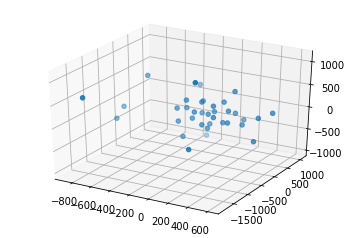

In [126]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(res[:, 0], res[:, 1], res[:, 2], cmap='Greens');
for label, x, y, z in 
plt.show()

In [129]:
res[:, 2]

array([  2.85254211e+02,  -2.28163086e+02,  -1.65795273e+02,
         1.39278976e+02,  -3.24657471e+02,   1.67298374e+01,
         5.42705139e+02,  -4.57495918e+01,  -1.64726318e+02,
        -1.23001442e+02,   4.98481476e+02,  -4.97282898e+02,
         9.33558884e+01,   1.36617798e+02,  -2.59762238e+02,
         7.33768177e+00,  -1.66636032e+02,   7.17577637e+02,
         1.60033630e+02,   1.08127393e+03,  -1.19598961e+02,
        -1.41897705e+02,   2.80929708e+00,   2.16381653e+02,
         2.30921448e+02,  -1.36702667e+02,  -9.80390625e+02,
         8.96420746e+01,   1.04400772e+02,  -2.62593140e+02,
        -2.71807831e+02,   1.71627701e+02,   6.32928963e+01,
         2.66807312e+02,  -1.69955673e+02,  -2.84095049e-01], dtype=float32)

In [132]:
len(brain_words), len(b_w)

(31, 36)

In [135]:
brain_words[-1] = 'hypothalamicpituitary hormones'
brain_words

['forebrain',
 'midbrain',
 'cerebrum',
 'ventricles',
 'corpus callosum',
 'thalamus',
 'hypotalamus',
 'pituitary gland',
 'pons',
 'medulla',
 'cerebellum',
 'hindbrain',
 'brain stem',
 'somatotropin',
 'lobe',
 'gyrus',
 'neurohormone',
 'progesterone',
 'corticoprim',
 'dopamine',
 'oxytocin',
 'thyrotropin',
 'vasoactive intestinal peptide',
 'peptide',
 'hypothalamicpituitary hormone',
 'melatonin',
 'n-acetylserotonin',
 'hydroxymelatonin',
 'anterior pituitary hormones',
 'posterior pituitary hormones',
 'hypothalamicpituitary hormones']

In [144]:
brain_words

['forebrain',
 'midbrain',
 'cerebrum',
 'ventricles',
 'corpus callosum',
 'thalamus',
 'hypotalamus',
 'pituitary gland',
 'pons',
 'medulla',
 'cerebellum',
 'hindbrain',
 'brain stem',
 'somatotropin',
 'lobe',
 'gyrus',
 'neurohormone',
 'progesterone',
 'corticoprim',
 'dopamine',
 'oxytocin',
 'thyrotropin',
 'vasoactive intestinal peptide',
 'peptide',
 'hypothalamicpituitary hormone',
 'melatonin',
 'n-acetylserotonin',
 'hydroxymelatonin',
 'anterior pituitary hormones',
 'posterior pituitary hormones',
 'hypothalamicpituitary hormone']